# HW1 - Locke Patton

In [1]:
import numpy as np
from scipy.integrate import odeint
import scipy.special as special
import astropy.units as u
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Problem 1.

#### If we lived in a Olberian universe calculate the distance at which any random line-of-sight will intersect the surface of a star (this is referred to as the point at which the optical depth of uniformly distributed stars is unity).
#### Assume all the stars have the same luminosity as the Sun, the average number density of stars is $10^9$ Mpc<sup>-3</sup>, and the radius of the stars is $7 \cdot 10^8$m.

The point at which an Olberian universe with uniformly distributed stars has an optical depth of unity is at the point where the surface area "blocked" by the stars within a sphere of radius $r_{max}$ is equal to the total surface area of a shell of radius $r_{max}$.

In other words, we need to find the radius $r_{max}$ at which:

$$Optical\,Depth = \frac{All\,surface \,area \,blocked \,by\, stars\, within \,a \,sphere \,of \,radius \,r_{max}}{Total \,surface \,area \,of \,shell \,with \,radius \,r_{max}}$$

$$1 = \frac{\int_{r=0}^{r_{max}}  SA_{star\,with\,radius\,r_{star}} \, n_{stars} (r)}{4\pi r_{max}^{2}}$$

Assuming that the radius of the star $r_{star} << 2*\pi r$, an pole to pole arc length on a given shell of radius r, we can aproximate $SA_{star\,with\,radius\,r_{star}}$ as a cirlce with radius $r_{star}$, or:

$$SA_{star\,with\,radius\,r_{star}} = \pi r_{effective}^2$$

Consider any given star at a distance $r$ from the center of the sphere, with radius $r_{star}$. Let's call  $r_{effective}$ the projected radius of the star at a distance $r_{max}$ from the center of the sphere. By comparing the two similar triangles with sides $r_{star}$ & $r$, and $r_{max}$ & $r_{effective}$, respectively, we observe:

$$r_{effective} = \frac{ r_{star} r_{max} }{r}$$

Next, to determine $ n_{stars} (r) $, we multiply n, the number density of stellar objects per volume of the shell, $4\pi r^2 \,dr$. When this volume is integrated over iterative shells of radius r, it matches units of volume. So:

$$ n_{stars} (r) = \int_{r=0}^{r_{max}} n 4\pi r^2 \,dr $$

This determines our equation for optical depth, which is equal to unity at $r_{max}$.

$$1 = \frac{\int_{r=0}^{r_{max}}  \pi(\frac{ r_{star} r_{max} }{r})^{2} \, n 4\pi r^2 \delta r}{4\pi r_{max}^{2}}$$

$$1 = \frac{ \pi n r_{star}^{2} r_{max}^2  \int_{r=0}^{r_{max}} \delta r}{ r_{max}^{2}}$$

$$1 = \pi n r_{star}^{2} r \lvert_{r=0}^{r_{max}} $$


$$1 = \pi n r_{star}^{2} r_{max}$$

$$r_{max} = \frac{1}{\pi n r_{star}^{2}} $$

This results, as seen below, in the distance at which any random line-of-sight will intersect the surface of a star of $6.1827\cdot 10^{17}$ Mpc.

In [2]:
r_star = (2.269 * 10**-14) * u.Mpc
num_density_n = 1* 10**9 * (1/u.Mpc)**3

r_max = 1/(np.pi *r_star**2*num_density_n)

i = ['r max:',r_max.to(u.Mpc),r_max.decompose()]
for l in enumerate(i):
    print l[1]

r max:
6.18274216171e+17 Mpc
1.90779488804e+40 m


## Problem 2.

#### When Edwin Hubble measured the expansion rate of the universe he derived a Hubble’s constant of 500 km s<sup>-1</sup> Mpc<sup>-1</sup>. To get this value of H<sub>o</sub> how incorrect were his estimates of the distances to Cepheid stars?

Both the Hubble and Current Estimation of Hubble's Constant will follow the relation known as Hubble's Law, seen here:
$$ H_o = \frac{v}{r} $$

$$ r= \frac{v}{H_o} $$

In [3]:
Ho_Hubble = 500 * u.km / (u.Mpc * u.s)
Ho_Current = 70 * u.km / (u.Mpc * u.s)
i = ['Hubble Estimation of Ho:',Ho_Hubble,'Current Estimation of Ho:',Ho_Current]
for l in enumerate(i):
    print l[1]

Hubble Estimation of Ho:
500.0 km / (Mpc s)
Current Estimation of Ho:
70.0 km / (Mpc s)


Using the two values listed above, taking the ratio of Hubble's Law and $r_{Hubble}$ to $r_{Current}$, the velocities of the Cepheid variable stars cancel:

$$ \frac{r_{Hubble}= \frac{v}{H_{o_{Hubble}}}}{r_{Current}= \frac{v}{H_{o_{Current}}}} $$

$$ \frac{r_{Hubble}}{r_{Current}} = \frac{H_{o_{Current}}}{H_{o_{Hubble}}} $$

Solving for $r_{Hubble}$: $$ r_{Hubble} = \frac{H_{o_{Current}}}{H_{o_{Hubble}}} r_{Current} $$

In [4]:
(Ho_Current/Ho_Hubble)**-1

<Quantity 7.142857142857142>

The distances that Hubble found would be a factor of $\frac{H_{o_{Current}}}{H_{o_{Hubble}}}$ times the true distace, or .14 times the true distance. This is an underestimation of the true distance.

#### How does his value of the universe change the age of the universe?

Although this is not always a true estimation of the age of the universe, the Hubble Time, $t_o = H_o^{-1}$ can stand as a proxy estimate of the age of the universe. Taking the ratio of the Current and Hubble estimation of Hubble's Constant:

$$ \frac{t_{o_{Hubble}} = H_{o_{Hubble}}^{-1}}{t_{o_{Current}} = H_{o_{Current}}^{-1}} $$

$$ t_{o_{Hubble}} = \frac{ H_{o_{Hubble}}^{-1} } { H_{o_{Current}}^{-1}}  t_{o_{Current}}  = \frac{ H_{o_{Current}} } { H_{o_{Hubble}}}  t_{o_{Current}} $$

So the age of the universe as determined by Hubble's estimation would be a factor of $\frac{H_{o_{Current}}}{H_{o_{Hubble}}}$ times the true age estimation using the current Hubble constant. Or Hubble would determine an age .14 times the true age of our Universe.

In [5]:
Age_universe = 13.7 * u.Gyr
i = ['Age of The Universe:',Age_universe,'Age of The Universe Predicted by Hubble:',Age_universe * Ho_Current/Ho_Hubble]
for l in enumerate(i):
    print l[1]

Age of The Universe:
13.7 Gyr
Age of The Universe Predicted by Hubble:
1.918 Gyr


#### Would we need to live in an accelerating or decelerating universe in order to reconcile the Hubble time with the current age of the universe (13.7 Gyr)?

To reconsile the age of the Universe as measured by Hubble with the true age of the universe, the universe would need to be decelerating.

Hubble estimation of Hubble's Constant is positive with a higher value than the current estimate. Since the hubble parameter is defined as:
$$ H_o = \frac{\dot{a_o}}{a_o}$$

At the current time, $a_{o}$ by definition is 1. This makes $H_o = \dot{a_o}$. Having a larger Hubble Constant means that the second derivative of the scale factor today is higher due to Hubble's estimation than its true value. Since Hubble's supposed universe would determine a shorter approximate age of the universe than our own, our universe would thus need to be decelerating in time to have a lower age to match Hubble's.

## Problem 3.

##### Ryden problem 3.2
##### Suppose you are a two dimensional being, living on the surface of a sphere with radius R. An object with width $\delta s << R$ is at a distance r from you (remember all distances are on a sphere). What angular width $\delta \theta$ will you measure for the object?

The path segment $\delta s$ on the surface of a sphere of radius R can be described in spherical coordinates using the metric:

$$ \delta s^{2} = \delta r^{2} + R^{2} sin^{2}(\frac{r}{R})\delta\theta^{2} $$

$$ \delta\theta^{2}  = \frac{\delta s^{2} - \delta r^{2}}{R^{2} sin^{2}(\frac{r}{R})} $$

##### Explain the behavior of $\delta \theta$ as $ r \rightarrow \pi R $.

To determine the behavior of $\delta \theta$ as $ r \rightarrow \pi R $, we take the following limit, where $\delta r=0$:

$$ \lim_{r \rightarrow \pi R} \delta\theta  = \lim_{r \rightarrow \pi R} \pm \frac{(\delta s^{2} - \delta r^{2})^{\frac{1}{2}}}{R\, sin(\frac{r}{R})} $$

$$ \lim_{r \rightarrow \pi R} \delta\theta  = \pm \frac{\lim_{r \rightarrow \pi R} \delta s}{\lim_{r \rightarrow \pi R}(R \,sin(\frac{r}{R}))} $$

$$ \lim_{r \rightarrow \pi R} \delta\theta  = \frac{\delta s}{R \,sin(\frac{\pi R}{R})} = \frac{\delta s}{R \,sin(\pi)} = \frac{\delta s}{0} = \infty $$

So $ \lim_{r \rightarrow \pi R} \delta\theta = \infty $.


Interestingly, if we observe the behavoir of $\delta s^2$:

$$ \lim_{r \rightarrow \pi R} \delta s^{2} = \lim_{r \rightarrow \pi R}  (\delta r^{2} + R^{2} sin^{2}(\frac{r}{R})\delta\theta^{2} ) $$

$$  \delta s^{2} = \lim_{r \rightarrow \pi R} ( \delta r^{2} )  + R^{2} sin^{2}(\frac{\pi R}{R})\delta\theta^{2} $$

Since, $ \lim_{r \rightarrow \pi R} ( \delta r^{2} ) = \pi^{2} \delta R^{2}  $,

$$  \delta s^{2} = \pi^{2} \delta R^{2} + R^{2} sin^{2}(\pi)\delta\theta^{2} $$

$$  \delta s^{2} = \pi^{2} \delta R^{2} + 0 *\delta\theta^{2} $$

$$  \delta s^{2} = \pi^{2} \delta R^{2} $$


So as $ r \rightarrow \pi R $, the portion of the path length $\delta s$ approaches 0 and $\delta \theta$ approaches $\infty$.

## Problem 4.


##### Using Python solve the following equation numerically and plot a(t) vs t. Note “.” represents the time derivative,
$$\dot{a}^{2}(x) = H_{0}^{2}a^{-3}$$
##### where $H_o$ is the Hubble constant ($H_o = 70\, \frac{km}{s\,Mpc}$).

To determine a(t) numerically, first I define $H_o$. Then I define $\dot{a}$ as a function of a and t (here defined as hubble). Then use scipy.integrate.odeint to find numerical solution.

In [6]:
Ho_Current = Ho_Current.to(1/u.s)
Ho_Hubble = Ho_Hubble.to(1/u.s)
print 'Ho being used is', Ho_Current,'.'

Ho being used is 2.26854550263e-18 1 / s .


In [7]:
def hubble(a,t):
    h = 70
    adot = (h*a**(-1.5))
    return adot

t = np.linspace(0, 10, 10000)
t2 = np.linspace(0, 10, 10)

solution = odeint(hubble, 1, t)
solution2 = odeint(hubble, 1, t2)

##### Solve the integration algebraically and overlay the solution on your plot.

$$\dot{a}^{2}(t) = H_{0}^{2}a^{-3}$$

$$\dot{a}(t) = \pm H_{0}a^{-3/2}$$

$$\frac{\delta a(t)}{\delta t} = \pm H_{0}a^{-3/2}$$

$$a^{3/2} \delta a= \pm H_{0}\delta t$$



$$\int_{0}^{a}  a^{3/2} \delta a= \pm \int_{0}^{t} H_{0}\delta t$$

$$ \frac{2}{5} a^{5/2}  \lvert_{0}^{a}= \pm  H_{0} t  \lvert_{0}^{t}$$

$$ \frac{2}{5} a^{5/2} = \pm  H_{0} t $$

$$ a^{5/2} = \pm  \frac{5}{2} H_{0} t $$

$$a(t) = (\frac{5}{2} H_{0} t)^{2/5}$$

In [8]:
def a(t):
    h = 70
    return (2.5*70*t)**(.4)

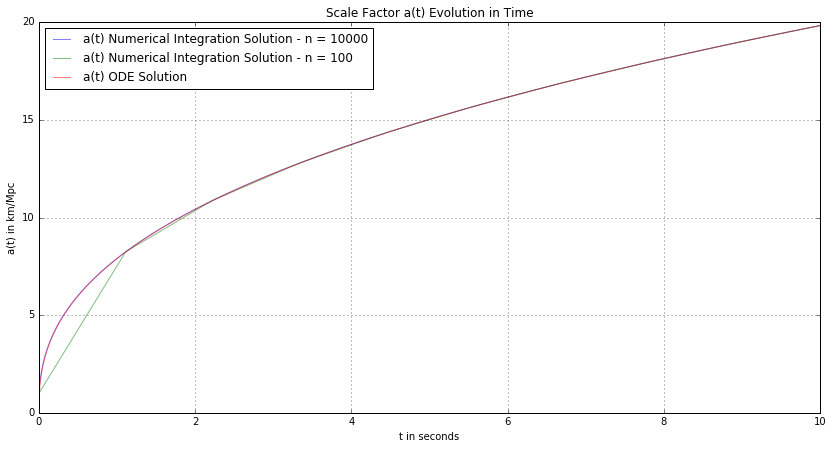

In [22]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(14,7)

ax.grid()
alpha=.5
ax.plot(t,solution,marker='',linestyle='-',alpha=alpha,label='a(t) Numerical Integration Solution - n = 10000');
ax.plot(t2,solution2,marker='',linestyle='-',alpha=alpha,label='a(t) Numerical Integration Solution - n = 100');
ax.plot(t,a(t),marker='',linestyle='-',alpha=alpha,label='a(t) ODE Solution');

ax.set_title('Scale Factor a(t) Evolution in Time')
ax.set_xlabel('t in seconds')
ax.set_ylabel('a(t) in km/Mpc')

ax.legend(loc=2);